<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>NLP with Deep Learning for Everyone</h1>
<h1>Sequence Modeling</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import gzip
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np
np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt 

from tqdm import tqdm
tqdm.pandas()

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import LSTM, GRU
from keras.layers import Dense
from keras.datasets import imdb
from keras.preprocessing import sequence

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 21.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: f6297d4276dfda02a7be65622fdf6e0d7a85cb58

numpy     : 1.19.2
tensorflow: 2.5.0
json      : 2.0.9
watermark : 2.1.0
matplotlib: 3.3.2
keras     : 2.4.3
pandas    : 1.1.3



Load default figure style

In [3]:
plt.style.use('./d4sci.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Load the IMDB dataset

In [4]:
top_words = 10000
max_words = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

word_dict = imdb.get_word_index()
word_list = ["<PAD>", "<START>", "<UNK>", "<UNUSED>"]
word_list.extend([k for k, v in sorted(word_dict.items(), key = lambda x:x[1])])
word_list = np.array(word_list)

In [5]:
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# SimpleRNN model

In [6]:
model = Sequential()
model.add(Embedding(top_words, 32))

model.add(SimpleRNN(32))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 34s 105ms/step - loss: 0.6859 - accuracy: 0.5429 - val_loss: 0.6342 - val_accuracy: 0.6300
Epoch 2/10
196/196 [==============================] - 21s 105ms/step - loss: 0.5403 - accuracy: 0.7485 - val_loss: 0.4152 - val_accuracy: 0.8250
Epoch 3/10
196/196 [==============================] - 21s 108ms/step - loss: 0.2878 - accuracy: 0.8884 - val_loss: 0.4221 - val_accuracy: 0.8239
Epoch 4/10
196/196 [==============================] - 23s 115ms/step - loss: 0.1220 - accuracy: 0.9637 - val_loss: 0.4621 - val_accuracy: 0.8200
Epoch 5/10
196/196 [==============================] - 22s 114ms/step - loss: 0.0439 - accuracy: 0.9920 - val_loss: 0.5367 - val_accuracy: 0.8149
Epoch 6/10
196/196 [==============================] - 24s 121ms/step - loss: 0.0136 - accuracy: 0.9992 - val_loss: 0.6047 - val_accuracy: 0.7994
Epoch 7/10
196/196 [==============================] - 29s 150ms/step - loss: 0.0055 - accuracy: 0.9997 - val_loss: 0.6445 - val_ac

In [9]:
def plot_history(history):    
    fig, ax_lst = plt.subplots(1, 2, sharex=True, sharey=True)

    epochs = np.array(history.epoch) + 1
    
    ax_lst[0].plot(epochs, history.history['loss'], label='Training')
    ax_lst[0].plot(epochs, history.history['val_loss'], label='Testing')
    ax_lst[0].set_ylabel('Loss')
    ax_lst[0].set_xlabel('Epoch')
    ax_lst[0].set_xticks(epochs)
    
    best_epoch = np.argmin(history.history['val_loss']) + 1
    ax_lst[0].axvline(x=best_epoch, linestyle=':', color=colors[2])
    ax_lst[0].legend()
    

    ax_lst[1].plot(epochs, history.history['accuracy'], label='Training')
    ax_lst[1].plot(epochs, history.history['val_accuracy'], label='Testing')
    ax_lst[1].set_ylabel('Accuracy')
    ax_lst[1].set_xlabel('Epoch')
    ax_lst[1].set_xticks(epochs)
    ax_lst[1].axvline(x=best_epoch, linestyle=':', color=colors[2])


    fig.tight_layout()

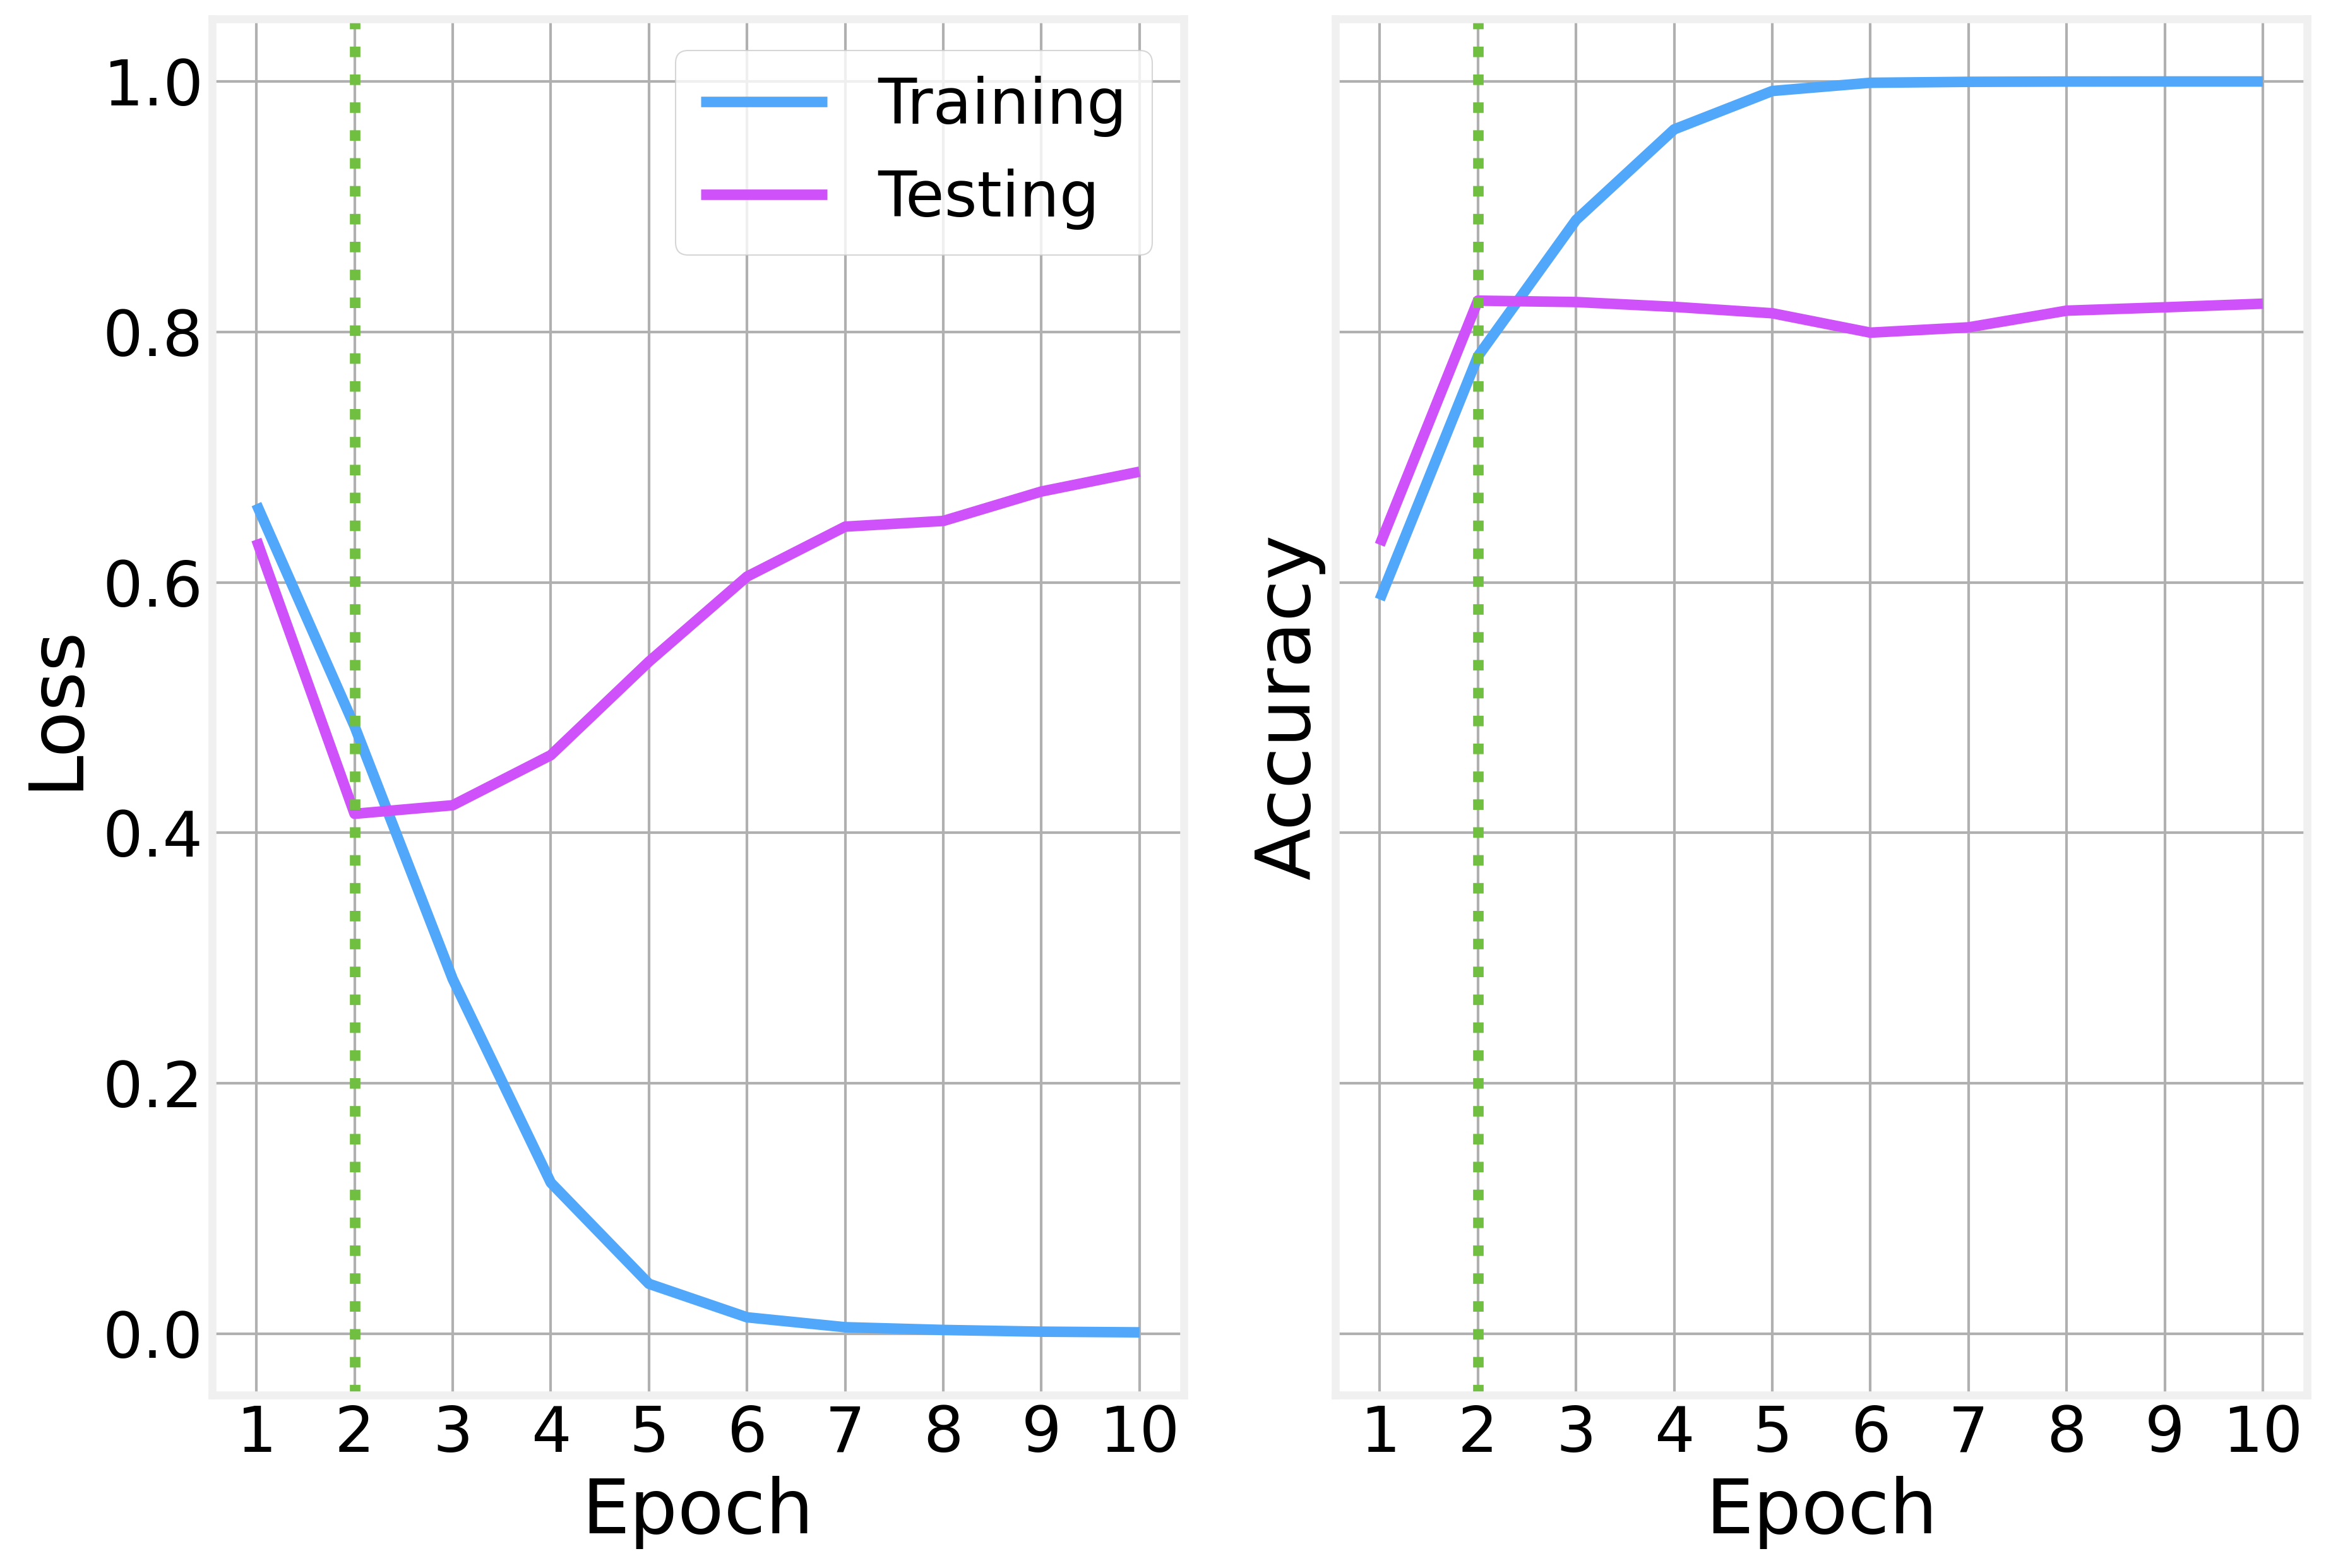

In [10]:
plot_history(history)

# GRU

In [11]:
model = Sequential()
model.add(Embedding(top_words, 32))

model.add(GRU(32))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
gru (GRU)                    (None, 32)                6336      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 43s 206ms/step - loss: 0.6126 - accuracy: 0.6281 - val_loss: 0.3237 - val_accuracy: 0.8619
Epoch 2/10
196/196 [==============================] - 49s 250ms/step - loss: 0.2563 - accuracy: 0.9006 - val_loss: 0.3284 - val_accuracy: 0.8590
Epoch 3/10
196/196 [==============================] - 47s 242ms/step - loss: 0.1972 - accuracy: 0.9278 - val_loss: 0.3192 - val_accuracy: 0.8660
Epoch 4/10
196/196 [==============================] - 46s 234ms/step - loss: 0.1415 - accuracy: 0.9518 - val_loss: 0.4014 - val_accuracy: 0.8289
Epoch 5/10
196/196 [==============================] - 58s 296ms/step - loss: 0.1453 - accuracy: 0.9491 - val_loss: 0.3617 - val_accuracy: 0.8661
Epoch 6/10
196/196 [==============================] - 55s 281ms/step - loss: 0.1021 - accuracy: 0.9681 - val_loss: 0.4095 - val_accuracy: 0.8605
Epoch 7/10
196/196 [==============================] - 59s 299ms/step - loss: 0.0895 - accuracy: 0.9724 - val_loss: 0.4292 - val_ac

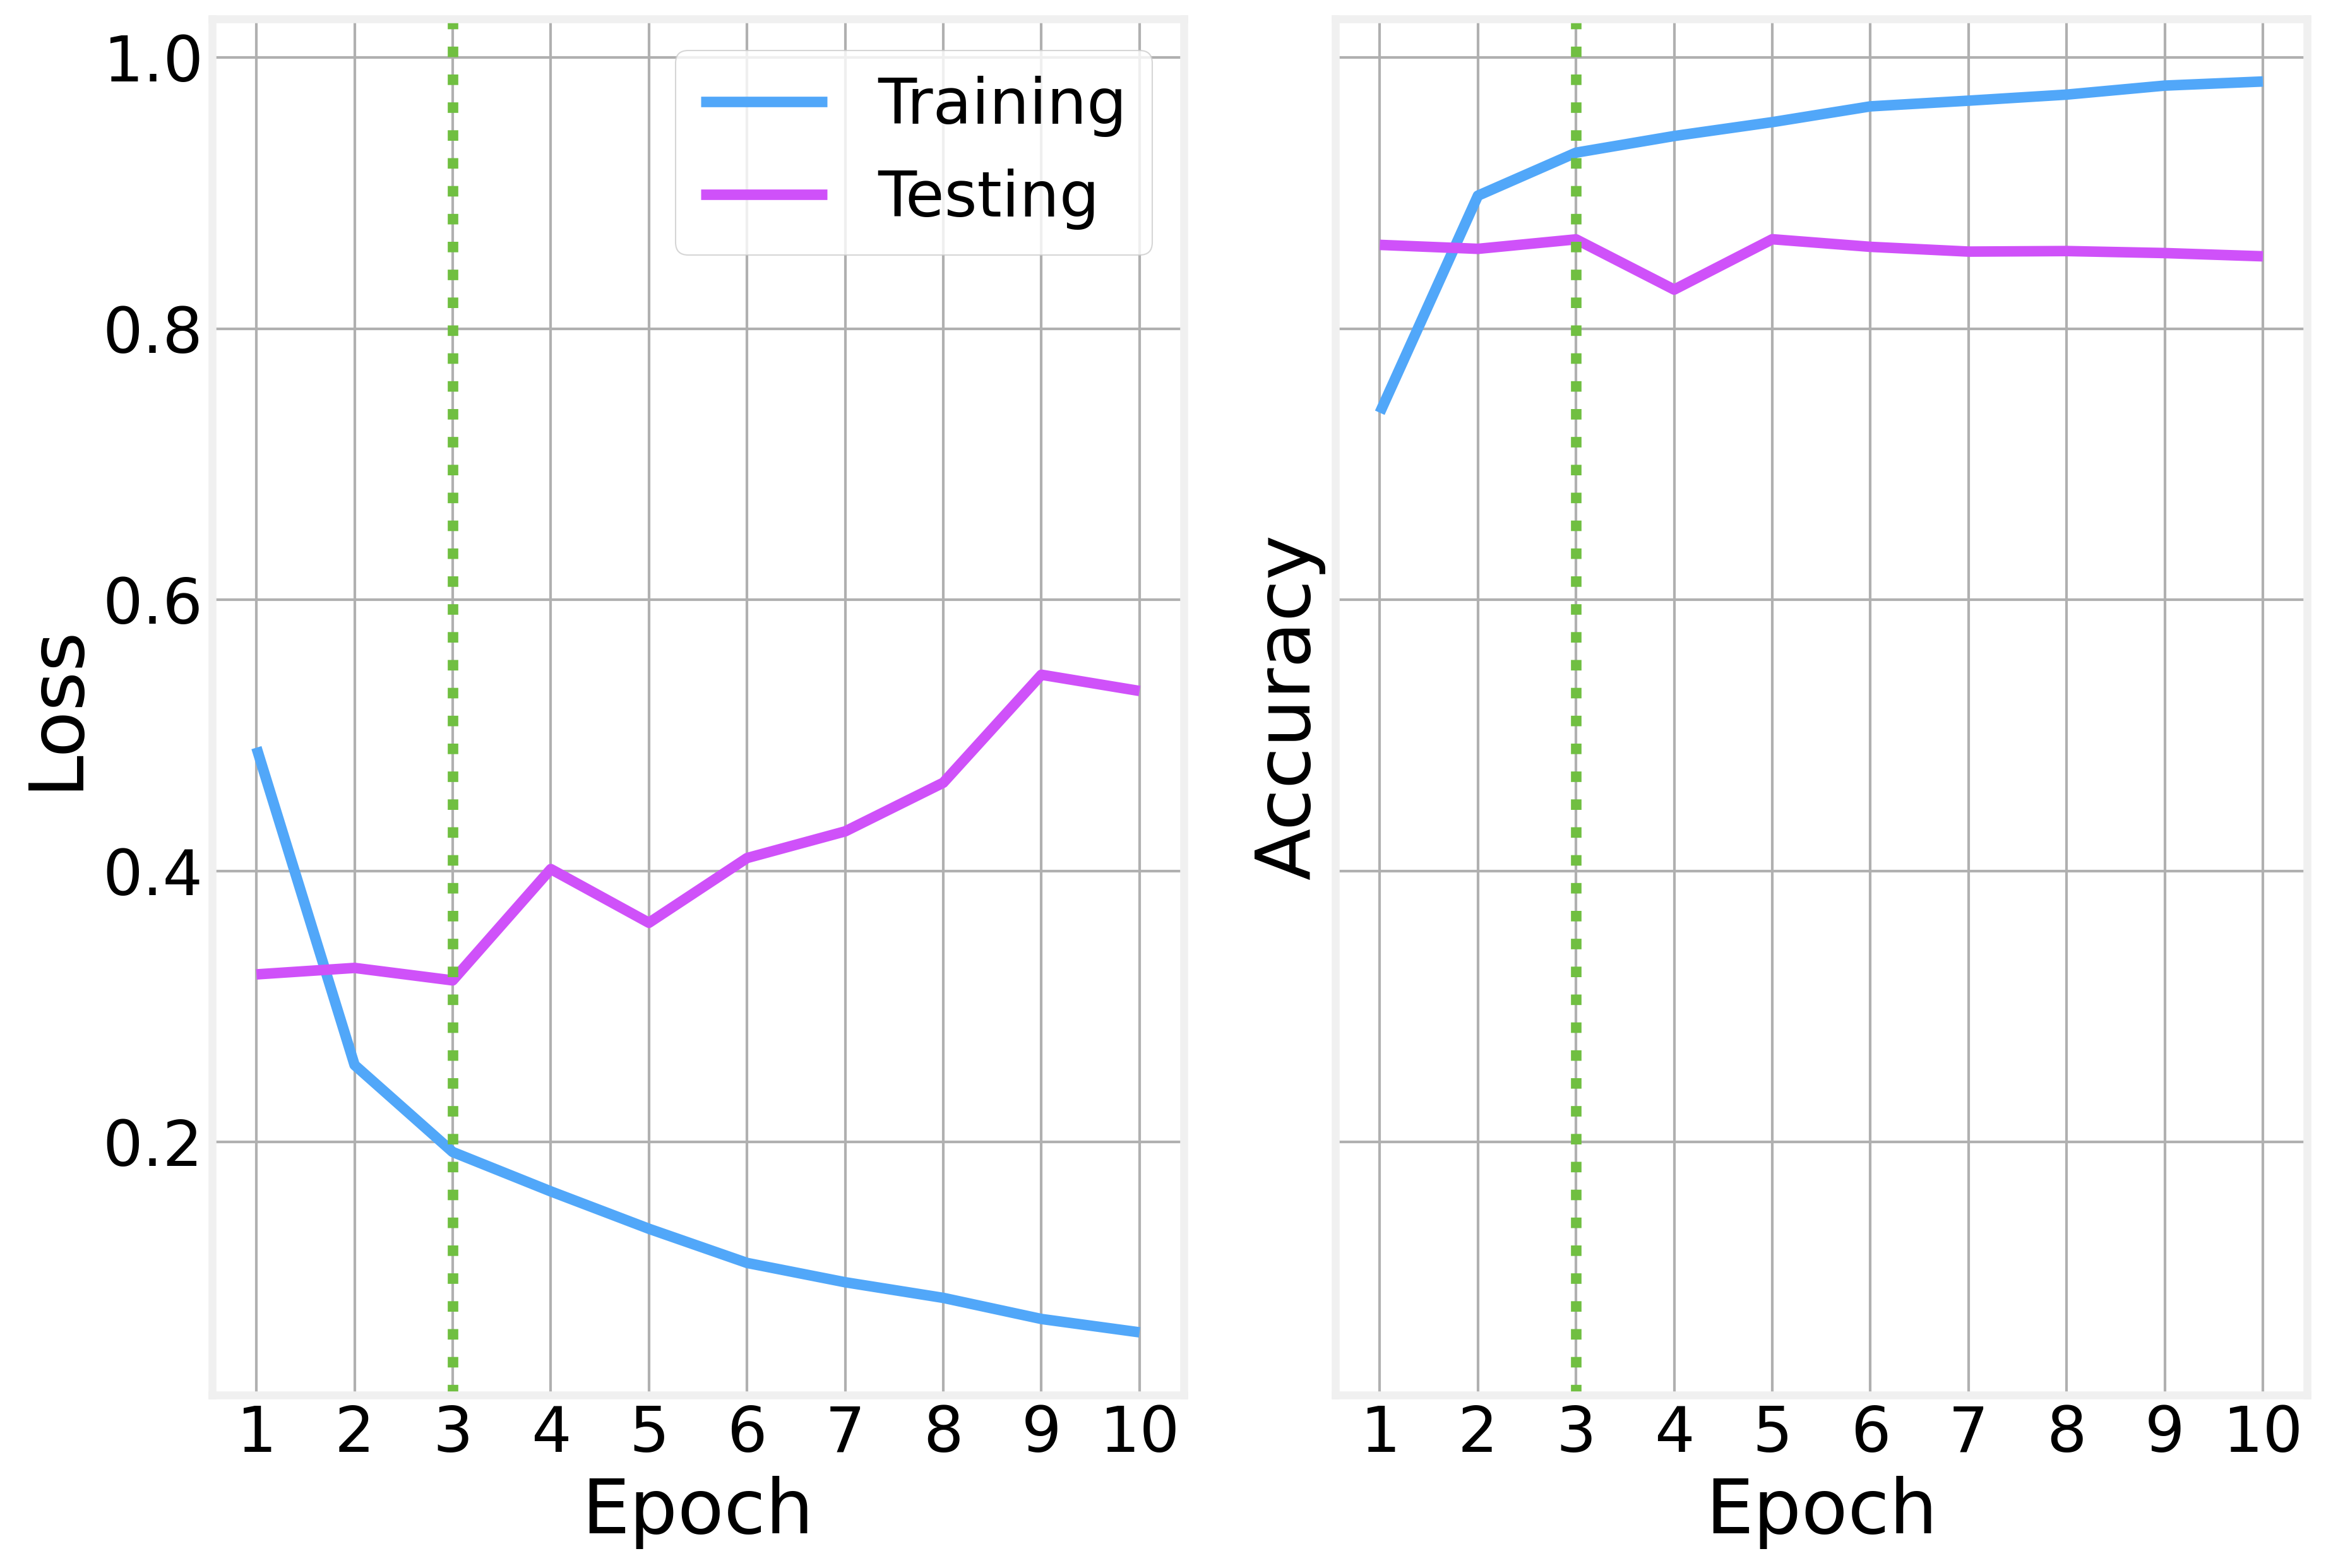

In [13]:
plot_history(history)

# LSTM

In [14]:
model = Sequential()
model.add(Embedding(top_words, 32))

model.add(LSTM(32))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 69s 337ms/step - loss: 0.6175 - accuracy: 0.6621 - val_loss: 0.3552 - val_accuracy: 0.8501
Epoch 2/10
196/196 [==============================] - 62s 318ms/step - loss: 0.2825 - accuracy: 0.8914 - val_loss: 0.3074 - val_accuracy: 0.8692
Epoch 3/10
196/196 [==============================] - 60s 308ms/step - loss: 0.2078 - accuracy: 0.9301 - val_loss: 0.3006 - val_accuracy: 0.8741
Epoch 4/10
196/196 [==============================] - 56s 288ms/step - loss: 0.1500 - accuracy: 0.9503 - val_loss: 0.3330 - val_accuracy: 0.8724
Epoch 5/10
196/196 [==============================] - 75s 381ms/step - loss: 0.1169 - accuracy: 0.9611 - val_loss: 0.4176 - val_accuracy: 0.8668
Epoch 6/10
196/196 [==============================] - 61s 310ms/step - loss: 0.1010 - accuracy: 0.9671 - val_loss: 0.3701 - val_accuracy: 0.8680
Epoch 7/10
196/196 [==============================] - 64s 325ms/step - loss: 0.1071 - accuracy: 0.9629 - val_loss: 0.5184 - val_ac

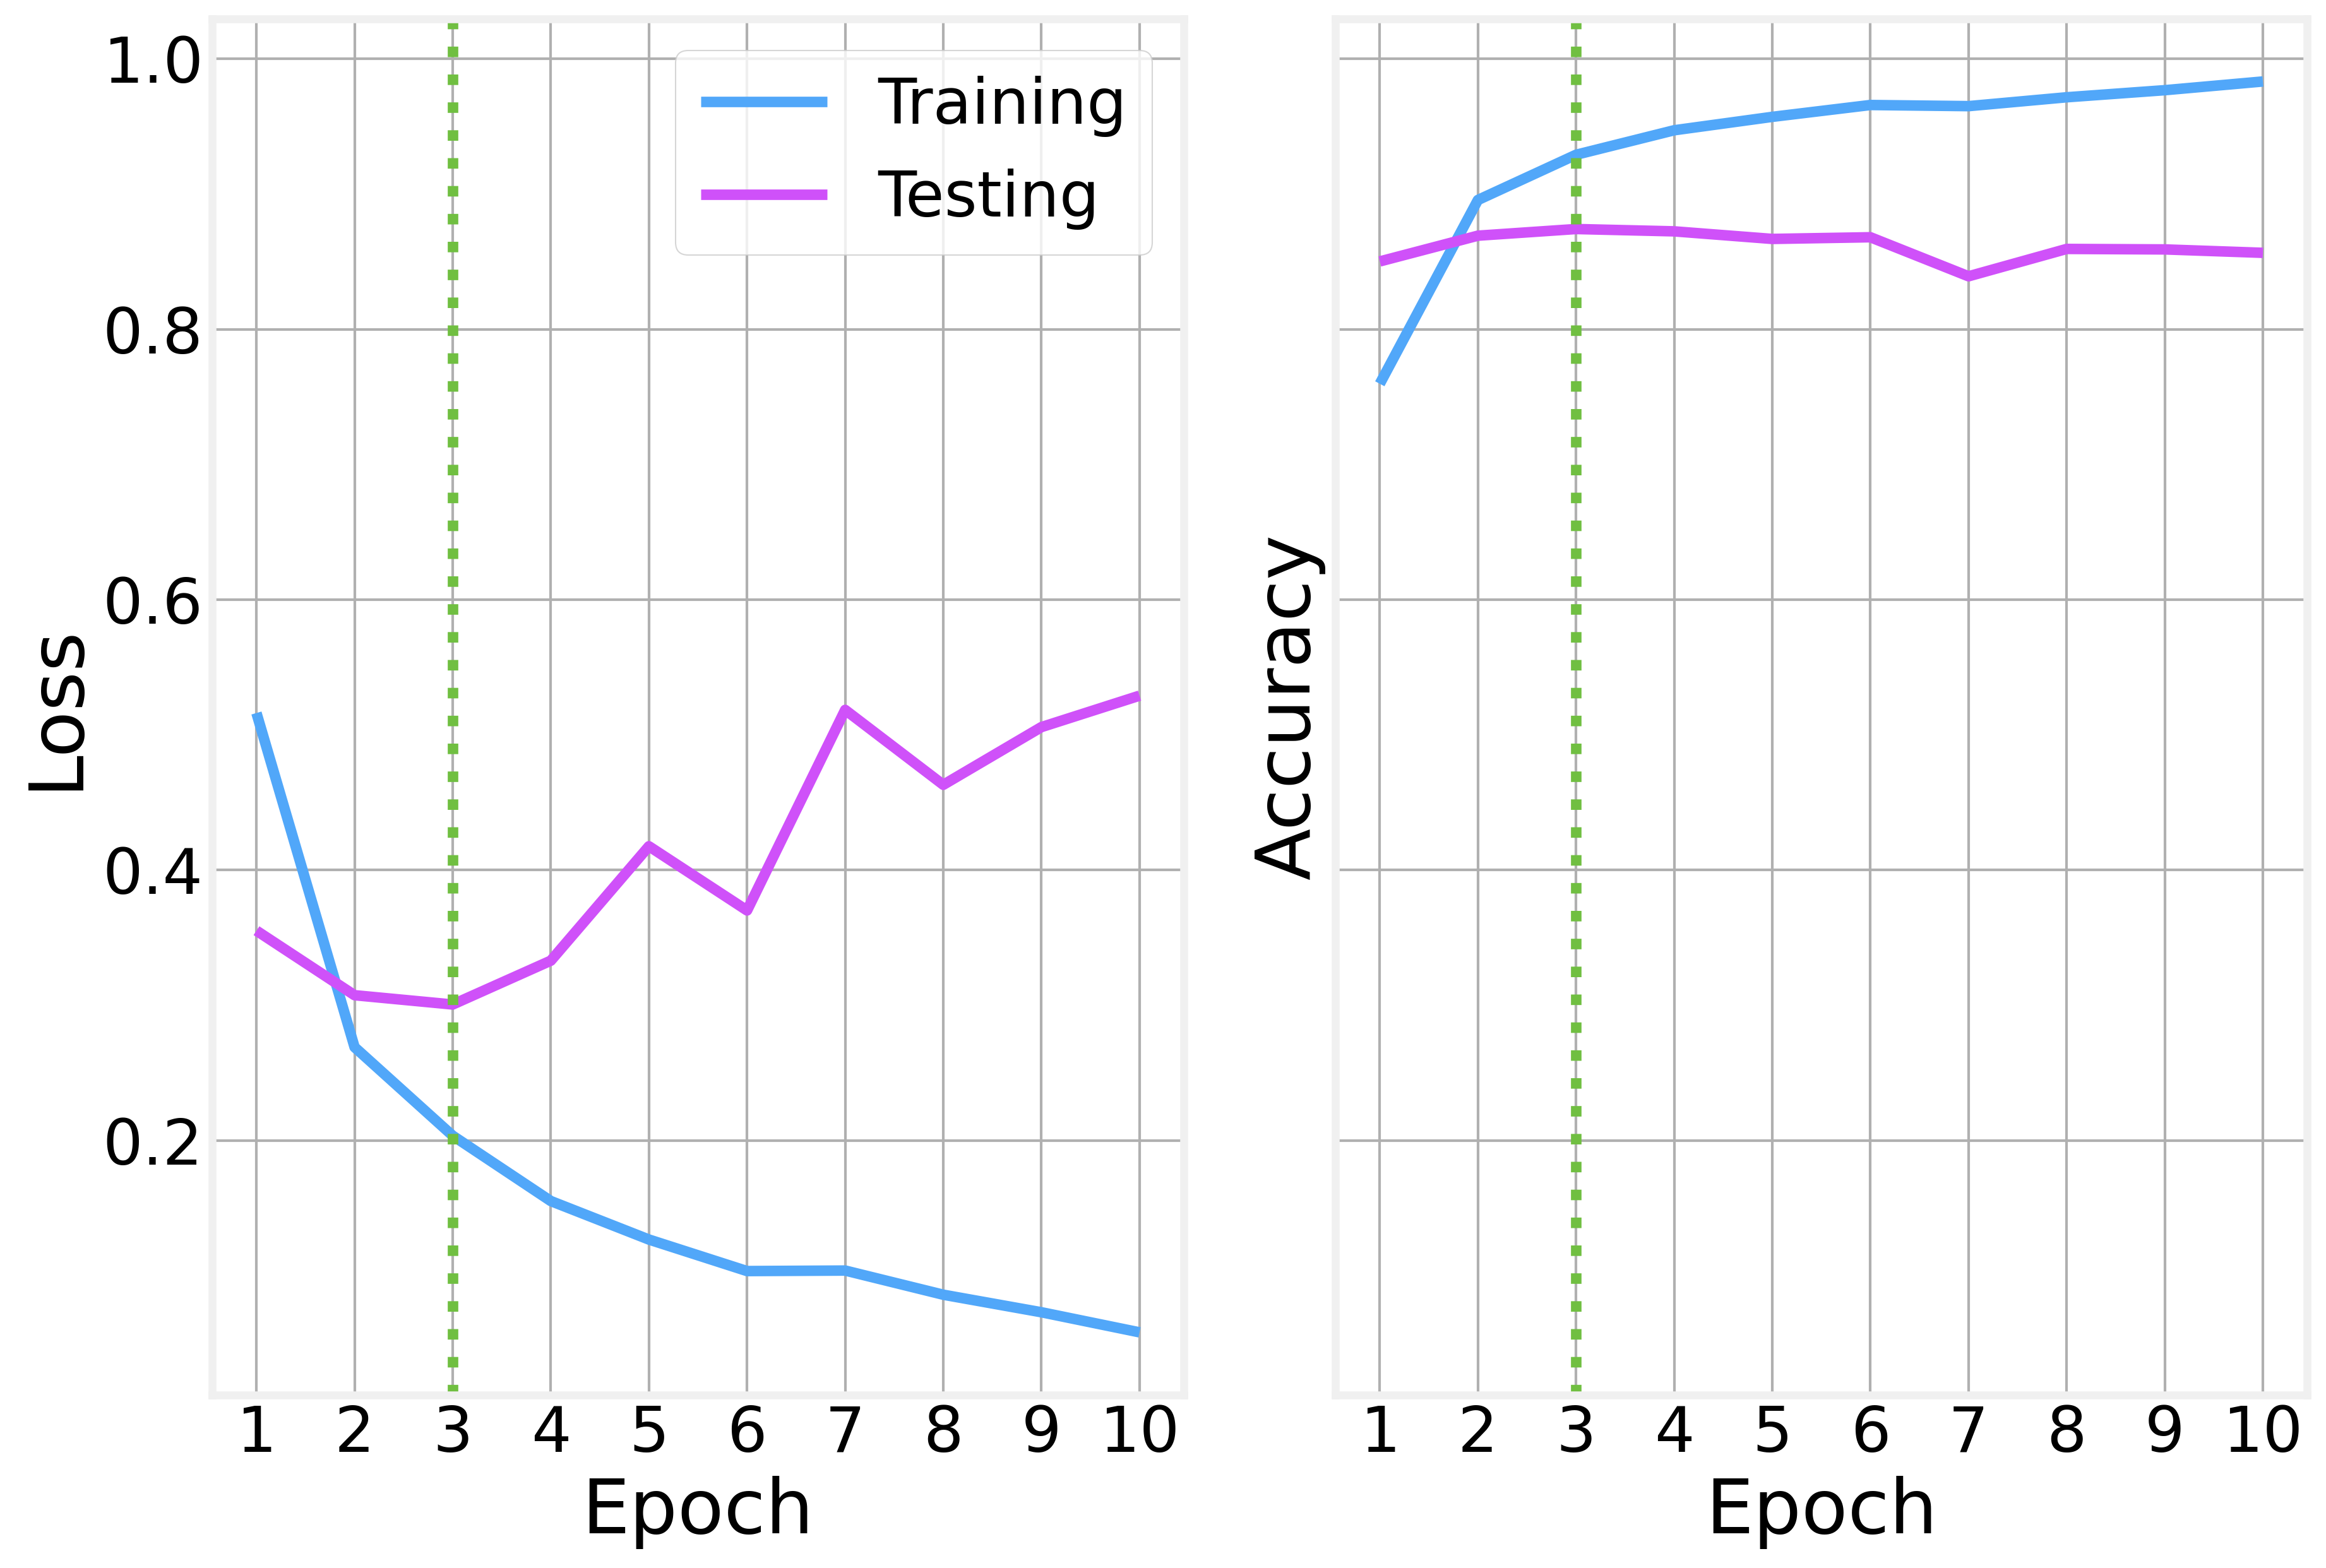

In [16]:
plot_history(history)

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>